In [1436]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier      # 분류
# from sklearn.neighbors import KNeighborsRegressor       # 회귀 예측
# from sklearn.linear_model import LinearRegression       # 선형 회귀
# from sklearn.preprocessing import PolynomialFeatures    # 다항특성을 만들어주는 라이브러리
# from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import requests
import random
import glob,os.path,re
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['axes.unicode_minus']=False

타이타닉 생존자 분류 모델을 구현하시오
target : survived

분류 : knn, 로지스틱, rforest

In [1437]:
# 데이터 확인 : nan, 0, 타입
# - pclass : Passenger Class, 승객 등급
# - survived : 생존 여부 : target 값이 됨.
# - name : 승객 이름
# - sex : 승객 성별
# - age : 승객 나이
# - sibsp : 탑승 한 형제/배우자 수
# - parch : 탑승 한 부모/자녀 수
# - ticket : 티켓 번호
# - fare : 승객 지불 요금
# - cabin : 선실 이름
# - embarked : 승선항 (C = 쉘 부르그, Q = 퀸즈타운, S = 사우스 햄튼)
# - body : 사망자 확인 번호 - 분석과정에서 제외해야 함. 머신러닝에 100% 영향을 미침.
# - home.dest : 고향/목적지

In [1438]:
df = pd.read_csv('titanic_train.csv')
df.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.0,0,1,250644,19.5,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.0,1,1,29103,23.0,NaN,S,NaN,"Cornwall / Akron, OH"


In [1439]:
# df.info()

df['cabin'].value_counts()

cabin
C23 C25 C27    5
C78            4
G6             4
F33            3
F4             3
              ..
A9             1
E68            1
C30            1
E60            1
B78            1
Name: count, Length: 150, dtype: int64

In [1440]:
df


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,body,home.dest
0,2,1,"Mellinger, Miss. Madeleine Violet",female,13.00,0,1,250644,19.5000,NaN,S,NaN,"England / Bennington, VT"
1,2,1,"Wells, Miss. Joan",female,4.00,1,1,29103,23.0000,NaN,S,NaN,"Cornwall / Akron, OH"
2,2,1,"Duran y More, Miss. Florentina",female,30.00,1,0,SC/PARIS 2148,13.8583,NaN,C,NaN,"Barcelona, Spain / Havana, Cuba"
3,3,0,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q,NaN,NaN
4,3,1,"Bradley, Miss. Bridget Delia",female,22.00,0,0,334914,7.7250,NaN,Q,NaN,"Kingwilliamstown, Co Cork, Ireland Glens Falls..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
911,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,NaN,"Devon, England Wichita, KS"
912,3,0,"Guest, Mr. Robert",male,NaN,0,0,376563,8.0500,NaN,S,NaN,NaN
913,3,1,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,NaN,NaN
914,2,1,"Sincock, Miss. Maude",female,20.00,0,0,C.A. 33112,36.7500,NaN,S,NaN,"Cornwall / Hancock, MI"


sex, age

In [1441]:
df.head(2)
df['sex'].replace('female','1',inplace=True)
df['sex'].replace('male','0',inplace=True)
df['age'].fillna(0,inplace=True)
# df
df2 = pd.read_csv('titanic_test.csv')
# df2
df2['sex'].replace('female','1',inplace=True)
df2['sex'].replace('male','0',inplace=True)
df2['age'].fillna(0,inplace=True)


C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_3364\3007375004.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace('female','1',inplace=True)
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_3364\3007375004.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

embarked

In [1465]:
df['embarked'].fillna('S',inplace=True)
df2['embarked'].fillna('S',inplace=True)
# df['embarked'].value_counts()
# df['embarked'].replace('S',0,inplace=True)
# df['embarked'].replace('C',1,inplace=True)
# df['embarked'].replace('Q',2,inplace=True)
# df2['embarked'].replace('S',0,inplace=True)
# df2['embarked'].replace('C',1,inplace=True)
# df2['embarked'].replace('Q',2,inplace=True)

# dataframe에서 생성
one_hotEncording = df['embarked']
pd.get_dummies(df['embarked'])
# for i in range(3):
#     t = pd.get_dummies(df.iloc[:,i+1], dtype=float)
#     one_hotEncording = pd.concat([one_hotEncording,t],axis=1)


C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_3364\1880395709.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['embarked'].fillna('S',inplace=True)


,0,1,2,3
0,True,False,False,False
1,True,False,False,False
2,False,True,False,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
911,True,False,False,False
912,True,False,False,False
913,False,False,True,False
914,True,False,False,False


name

In [1443]:
name = df['name'].to_numpy()
for i, j in enumerate(name):
    if j[j.find('.')-2:j.find('.')] == 'Mr':
        name[i]=1
    elif j[j.find('.')-2:j.find('.')] == 'Mr':
        name[i]=1
    elif j[j.find('.')-2:j.find('.')] == 'ss':
        name[i]=2
    elif j[j.find('.')-2:j.find('.')] == 'dy':
        name[i]=2
    elif j[j.find('.')-2:j.find('.')] == 'Ms':
        name[i]=2
    elif j[j.find('.')-2:j.find('.')] == 'rs':
        name[i]=3
    elif j[j.find('.')-2:j.find('.')] == 'er':
        name[i]=4
    elif j[j.find('.')-2:j.find('.')] == 'Dr':
        name[i]=5
    else:
        name[i]=6
print(name)
df['name']=name

[2 2 2 1 2 1 2 2 1 1 4 3 2 1 1 1 1 1 2 1 2 2 1 1 4 1 3 2 1 5 1 1 1 1 1 1 1
 1 1 2 4 1 1 2 1 1 1 1 1 1 3 3 1 1 3 1 1 1 1 1 1 2 3 2 1 1 3 5 1 1 1 3 1 2
 1 1 1 2 2 2 1 6 1 2 2 2 1 2 1 3 1 2 1 1 1 2 6 1 1 1 1 2 1 1 2 2 2 1 2 1 4
 1 1 1 1 1 3 3 3 1 1 1 2 1 6 1 2 1 5 3 2 4 1 1 1 1 1 3 2 1 2 1 1 3 1 1 3 1
 3 1 1 1 1 1 1 2 1 1 2 4 3 3 1 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 1 1 2 1 5 1 3
 2 2 3 3 1 1 1 1 2 1 1 1 3 1 2 2 1 3 3 1 2 3 1 1 1 1 1 1 1 1 1 2 2 3 1 2 1
 1 1 2 1 3 1 2 1 6 1 1 1 3 1 3 1 2 1 3 4 1 1 2 3 3 1 1 2 1 1 4 1 1 1 1 1 2
 2 1 3 3 2 3 1 1 2 1 1 4 2 1 1 1 1 1 1 3 1 1 1 3 1 1 1 1 1 3 2 1 1 2 2 1 1
 1 1 2 1 3 4 1 1 1 2 1 3 1 1 1 1 1 1 1 3 1 1 3 1 1 4 1 5 1 2 3 1 3 2 1 2 1
 1 2 3 1 6 2 2 1 1 1 3 1 2 2 3 2 1 1 1 3 1 1 3 2 1 1 1 1 3 2 2 1 1 3 2 1 1
 3 2 1 1 1 3 2 2 6 1 1 1 1 1 3 2 1 1 2 1 1 1 1 2 1 1 1 2 1 4 2 1 1 1 1 1 1
 1 3 1 1 1 6 1 1 2 1 1 1 2 1 1 2 1 1 1 1 3 1 2 2 1 3 1 2 1 1 4 4 3 1 1 2 1
 3 1 2 1 2 1 1 1 2 1 3 2 2 1 3 6 2 1 3 1 4 1 1 1 1 2 3 2 1 3 2 1 1 2 1 3 1
 1 1 4 3 1 3 1 1 1 1 3 1 

In [1444]:
name2 = df2['name'].to_numpy()
for i, j in enumerate(name2):
    if j[j.find('.')-2:j.find('.')] == 'Mr':
        name2[i]=1
    elif j[j.find('.')-2:j.find('.')] == 'Mr':
        name2[i]=1
    elif j[j.find('.')-2:j.find('.')] == 'ss':
        name2[i]=2
    elif j[j.find('.')-2:j.find('.')] == 'dy':
        name2[i]=2
    elif j[j.find('.')-2:j.find('.')] == 'Ms':
        name2[i]=2
    elif j[j.find('.')-2:j.find('.')] == 'rs':
        name2[i]=3
    elif j[j.find('.')-2:j.find('.')] == 'er':
        name2[i]=4
    elif j[j.find('.')-2:j.find('.')] == 'Dr':
        name2[i]=5
    else:
        name2[i]=6
print(name2)
df2['name2']=name2

[1 2 1 1 1 2 1 6 1 1 1 1 4 2 2 1 3 1 3 1 1 4 1 2 4 3 1 1 1 2 2 2 2 1 3 1 1
 1 1 1 1 1 1 4 2 4 1 3 4 1 2 1 1 3 1 1 3 3 2 2 1 6 2 4 2 2 1 1 1 2 3 1 1 1
 2 2 1 3 2 1 1 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 3 1 1 3 3 1 1 4 1 1 1 1
 1 1 1 2 1 1 1 1 2 1 4 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 2 1 2 1 3 1 1 1 1 2 1
 2 1 2 1 1 2 1 1 3 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 2 1 3 6 1 3 2 3 2 1 3 1 3
 2 3 1 1 1 6 3 3 1 1 2 1 3 1 1 1 1 1 2 1 1 1 4 1 1 2 1 1 1 2 1 1 1 1 1 3 3
 3 2 3 1 2 2 2 2 3 1 1 2 1 1 2 1 1 4 1 2 1 1 1 4 1 1 3 4 1 1 4 1 1 1 3 1 1
 1 1 1 1 2 1 2 1 1 1 3 1 2 1 1 1 3 3 2 2 2 1 2 6 2 2 1 1 1 2 1 2 1 3 2 3 1
 3 4 1 1 1 2 1 1 2 1 3 1 2 1 3 1 1 1 1 3 1 2 1 2 1 1 2 1 3 1 3 1 4 1 2 1 1
 2 1 2 1 1 3 3 2 4 4 3 3 3 2 1 1 1 2 2 1 1 1 1 4 1 2 1 1 1 1 1 3 3 3 1 1 1
 1 1 1 1 6 1 1 1 4 1 1 6 1 1 1 3 2 4 1 3 1 1 2]


cabin

In [1445]:
df['cabin'].fillna('H',inplace=True)
df['cabin'].replace(0,'H',inplace=True)
cabin = df['cabin'].to_numpy()
for i, j in enumerate(cabin):
    cabin[i] = ord(j[0])
print(cabin)
df['cabin']=cabin


df2['cabin'].fillna('H',inplace=True)
df2['cabin'].replace(0,'H',inplace=True)
cabin2 = df2['cabin'].to_numpy()
for i, j in enumerate(cabin2):
    cabin2[i] = ord(j[0])
print(cabin2)
df2['cabin']=cabin2

[72 72 72 72 72 72 69 72 67 69 72 72 67 72 72 72 72 72 72 72 72 72 72 72
 72 68 72 72 72 66 65 72 72 67 72 72 72 72 72 72 72 70 72 72 72 72 72 72
 67 67 69 72 72 72 66 72 72 67 72 72 72 72 72 72 72 72 68 72 72 72 72 72
 72 68 72 72 72 72 72 67 67 66 84 72 72 66 72 72 72 66 72 72 72 72 72 72
 65 72 72 65 72 72 72 72 72 72 72 72 72 72 66 72 72 72 72 72 72 71 72 72
 72 72 72 72 72 72 72 72 67 67 68 72 72 68 67 72 72 69 72 72 72 72 72 66
 66 72 69 72 67 72 72 66 72 72 72 72 72 72 72 72 72 65 72 68 69 72 67 72
 72 72 72 72 72 68 72 72 72 72 72 69 66 72 68 72 70 72 72 72 72 72 72 72
 69 68 72 65 72 72 68 72 65 72 70 72 68 65 66 72 72 72 72 68 69 72 72 72
 72 72 71 67 72 68 72 72 69 72 67 72 72 72 66 72 72 65 66 72 70 72 72 72
 68 72 72 72 72 67 67 72 72 72 72 72 70 67 72 67 72 67 71 72 72 67 67 69
 72 72 72 72 72 72 72 72 72 72 72 70 72 72 68 72 72 69 72 72 72 72 72 72
 72 72 72 68 72 72 72 72 72 72 72 72 66 72 72 72 72 72 67 72 72 66 72 72
 67 72 72 69 70 72 72 72 72 72 72 72 72 72 67 72 68

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_3364\3034108257.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cabin'].fillna('H',inplace=True)
C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_3364\3034108257.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [1446]:
train_into = df[['pclass','name','sex','age','sibsp','parch','fare','cabin','embarked']]
train_target = df['survived']
test_into = df2[['pclass','name','sex','age','sibsp','parch','fare','cabin','embarked']]
test_target = df2['survived']

In [1447]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_into)
train_scaled = ss.transform(train_into)
test_scaled = ss.transform(test_into)


In [1448]:
train_into

,pclass,name,sex,age,sibsp,parch,fare,cabin,embarked
0,2,2,1,13.00,0,1,19.5000,72,0
1,2,2,1,4.00,1,1,23.0000,72,0
2,2,2,1,30.00,1,0,13.8583,72,1
3,3,1,0,0.00,0,0,7.7250,72,2
4,3,2,1,22.00,0,0,7.7250,72,2
...,...,...,...,...,...,...,...,...,...
911,3,2,1,0.17,1,2,20.5750,72,0
912,3,1,0,0.00,0,0,8.0500,72,0
913,3,2,1,0.00,0,0,7.7333,72,2
914,2,2,1,20.00,0,0,36.7500,72,0


<Axes: >

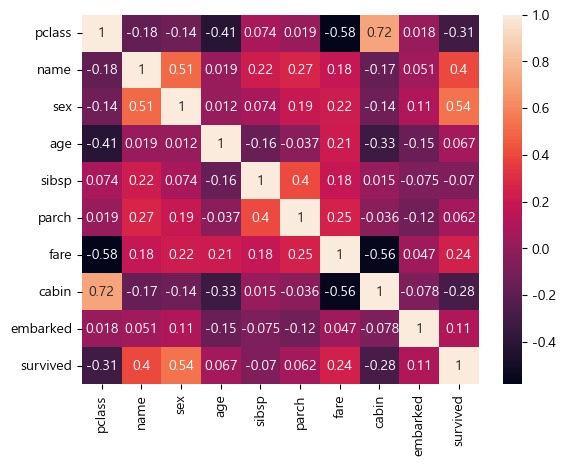

In [1449]:
all = df[['pclass','name','sex','age','sibsp','parch','fare','cabin','embarked','survived']]
import seaborn as sns
sns.heatmap(all.corr(),annot=True)

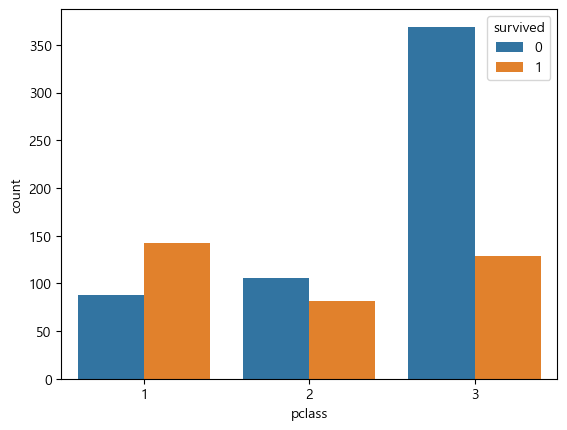

In [1450]:
ax = sns.countplot(x='pclass',hue='survived',data=all)


knn

In [1451]:
from sklearn.neighbors import KNeighborsClassifier
kf = KNeighborsClassifier()
kf.fit(train_scaled,train_target)
print(kf.score(train_scaled,train_target))
print(kf.score(test_scaled,test_target))

0.851528384279476
0.8015267175572519


In [1452]:
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier


logistic

In [1453]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled,train_target)
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.7936681222707423
0.7786259541984732


logistic 반복, 제한

In [1454]:
lr2 = LogisticRegression(C=10,max_iter=5)
lr2.fit(train_scaled,train_target)
print(lr2.score(train_scaled,train_target))
print(lr2.score(test_scaled,test_target))

0.7914847161572053
0.7786259541984732


c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


경사하강

In [1455]:
from sklearn.linear_model import SGDClassifier
sg = SGDClassifier(loss='log_loss',max_iter=10,random_state=1)
sg.fit(train_scaled,train_target)
print(sg.score(train_scaled,train_target))
print(sg.score(test_scaled,test_target))

0.8024017467248908
0.7786259541984732


c:\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


partial

In [1456]:
classes = np.unique(train_target)
sg.partial_fit(train_scaled,train_target,classes=classes)
print(sg.score(train_scaled,train_target))
print(sg.score(test_scaled,test_target))

0.7903930131004366
0.7684478371501272


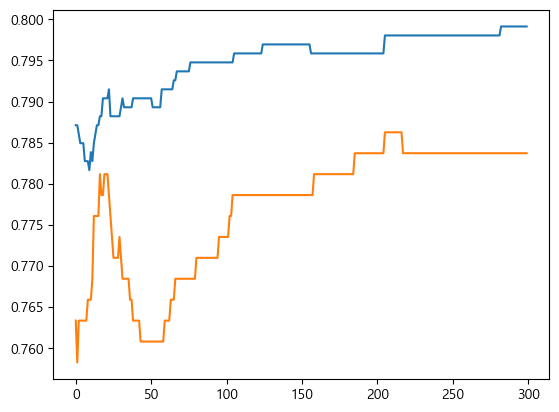

In [1457]:
train = []
test = []
for i in range(300):
    sg.partial_fit(train_scaled,train_target,classes=classes)
    train.append(sg.score(train_scaled,train_target))
    test.append(sg.score(test_scaled,test_target))

plt.plot(train)
plt.plot(test)

In [1458]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(train_scaled,train_target)
print(rf.score(train_scaled,train_target))
print(rf.score(test_scaled,test_target))

0.980349344978166
0.7811704834605598


In [1459]:
scores2 = cross_validate(rf,train_scaled,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores2['train_score']))
print(np.mean(scores2['test_score']))

0.9825326713334676
0.8111190306486102


In [1460]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=50)
tree.fit(train_scaled,train_target)
print(tree.score(train_scaled,train_target))
print(tree.score(test_scaled,test_target))

xgb = XGBClassifier(tree_method='hist')
scores = cross_validate(xgb,train_scaled,train_target,return_train_score=True,n_jobs=-1)

print(np.mean(scores['train_score']))
print(np.mean(scores['test_score']))

0.980349344978166
0.7251908396946565
0.975435555654955
0.8056545497742931


In [1461]:
tree2 = DecisionTreeClassifier(max_depth=3,min_impurity_decrease=0.001)
tree2.fit(train_scaled,train_target)
print(tree2.score(train_scaled,train_target))
print(tree2.score(test_scaled,test_target))

0.8133187772925764
0.8091603053435115


[Text(0.5, 0.875, 'x[1] <= -0.241\ngini = 0.474\nsamples = 916\nvalue = [563, 353]'),
 Text(0.25, 0.625, 'x[7] <= 0.029\ngini = 0.267\nsamples = 523\nvalue = [440, 83]'),
 Text(0.125, 0.375, 'x[3] <= -0.287\ngini = 0.427\nsamples = 94\nvalue = [65, 29]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.1875, 0.125, 'gini = 0.457\nsamples = 82\nvalue = [53, 29]'),
 Text(0.375, 0.375, 'x[3] <= 0.871\ngini = 0.22\nsamples = 429\nvalue = [375.0, 54.0]'),
 Text(0.3125, 0.125, 'gini = 0.24\nsamples = 372\nvalue = [320.0, 52.0]'),
 Text(0.4375, 0.125, 'gini = 0.068\nsamples = 57\nvalue = [55, 2]'),
 Text(0.75, 0.625, 'x[0] <= 0.246\ngini = 0.43\nsamples = 393\nvalue = [123.0, 270.0]'),
 Text(0.625, 0.375, 'x[1] <= 2.531\ngini = 0.217\nsamples = 210\nvalue = [26, 184]'),
 Text(0.5625, 0.125, 'gini = 0.147\nsamples = 188\nvalue = [15, 173]'),
 Text(0.6875, 0.125, 'gini = 0.5\nsamples = 22\nvalue = [11, 11]'),
 Text(0.875, 0.375, 'x[6] <= -0.194\ngini = 0.498\nsamples 

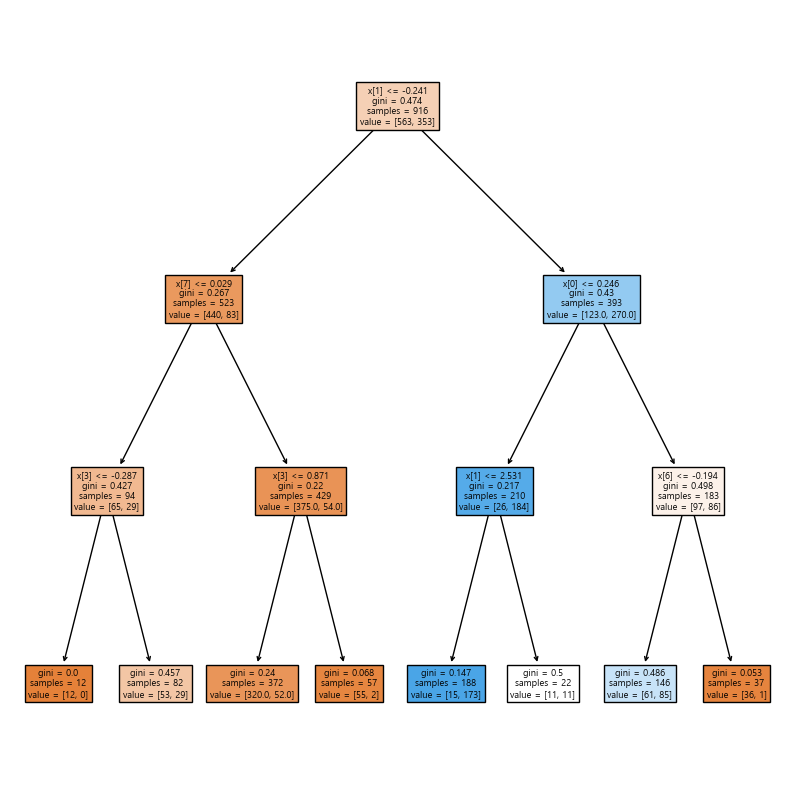

In [1462]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(tree2,filled=True)